In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [65]:
data = pd.read_csv('cars.csv', delimiter=',')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [66]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [68]:
data.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [69]:
numerical_cols = ['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
for col in numerical_cols:
    data[col] = data[col].str.extract('(\d+\.\d+|\d+)').astype(float) if col == 'max_power' else data[col]
    data[col].fillna(data[col].mean(), inplace=True)

In [70]:
print(data.isnull().sum())

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [72]:
data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.981875,497.017504,35.343246,0.946450
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [73]:
data.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

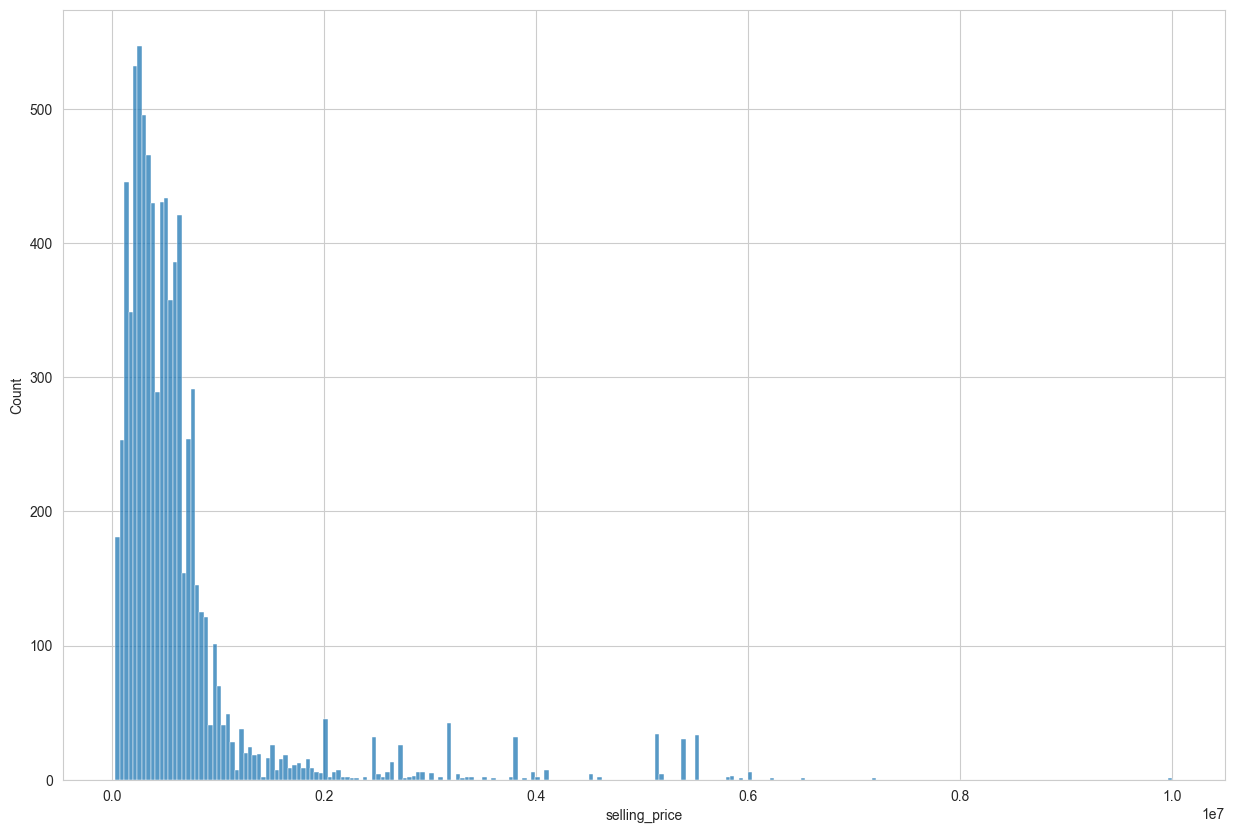

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.histplot(data.selling_price)
plt.show()

In [75]:
data.corr()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2188\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.310383,0.017773,0.213282,-0.008623
selling_price,0.414092,1.000000,-0.225534,-0.125454,0.453567,0.744958,0.041161
km_driven,-0.418006,-0.225534,1.000000,-0.171426,0.203954,-0.037714,0.225172
mileage(km/ltr/kg),0.310383,-0.125454,-0.171426,1.000000,-0.575831,-0.373586,-0.452085
engine,0.017773,0.453567,0.203954,-0.575831,1.000000,0.702152,0.610309
max_power,0.213282,0.744958,-0.037714,-0.373586,0.702152,1.000000,0.191435
seats,-0.008623,0.041161,0.225172,-0.452085,0.610309,0.191435,1.000000


C:\Users\OMEN\AppData\Local\Temp\ipykernel_2188\3161850099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="coolwarm")


<AxesSubplot: >

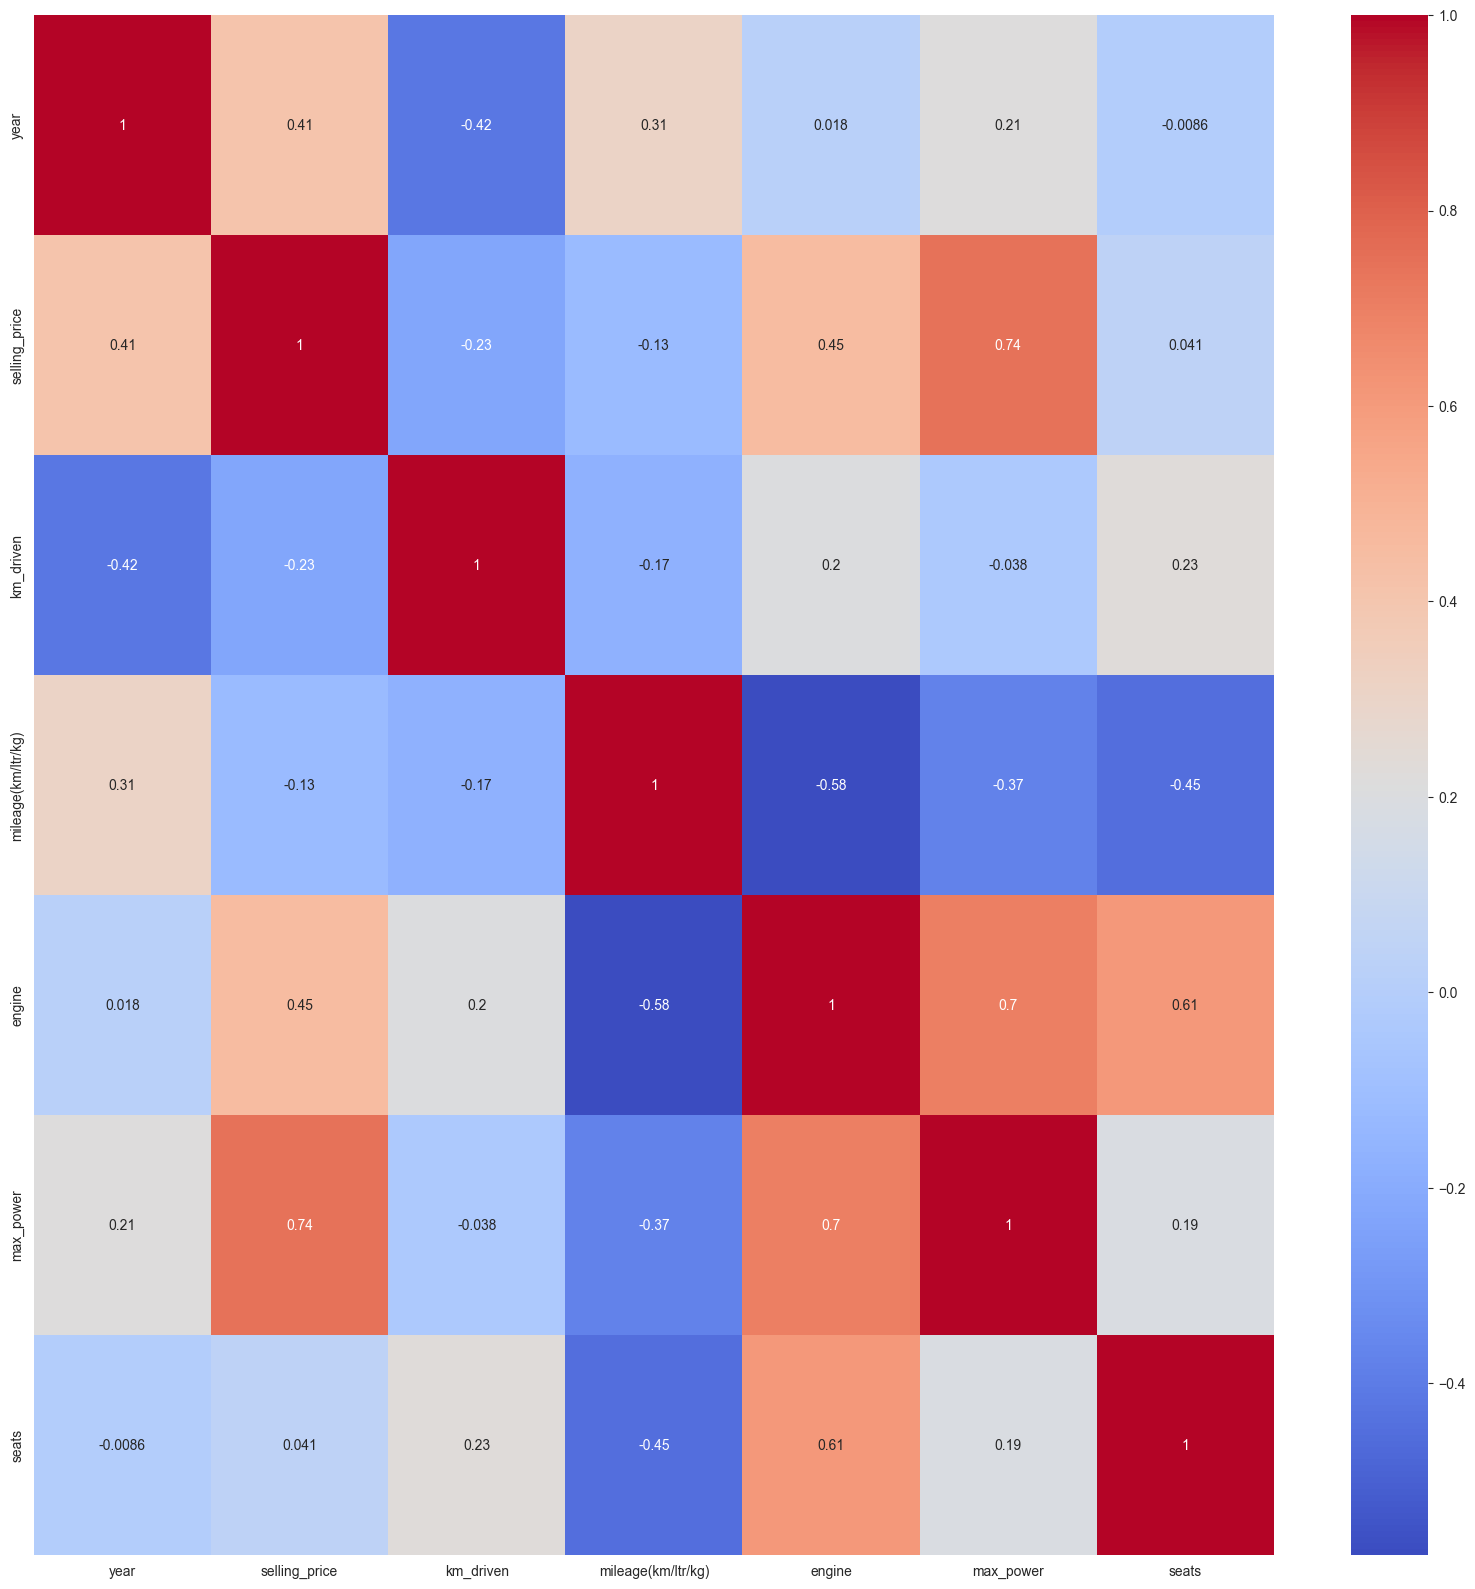

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap="coolwarm")

In [77]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [79]:
data = data.drop('name', 1)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2188\980189365.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('name', 1)


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8128 non-null   int64  
 1   selling_price       8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   float64
 10  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [81]:
data = data.drop(['selling_price'],1)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2188\2965525363.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['selling_price'],1)


In [82]:
numerical = data.select_dtypes(include=['int64', 'float64']).columns
categoricalcategorical = data.select_dtypes(include=['object']).columns

In [83]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [84]:
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(data[categorical]).toarray()

In [85]:
print(categorical)

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [86]:
scaler = MinMaxScaler()
min_max_scaled_numerical = scaler.fit_transform(data[numerical])

In [87]:
print(numerical)

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


In [88]:
transformed_data = np.concatenate((min_max_scaled_numerical, encoded_categorical), axis=1)

In [89]:
transformed_data

array([[0.83783784, 0.06164021, 0.55714286, ..., 0.        , 0.        ,
        0.        ],
       [0.83783784, 0.05083721, 0.50333333, ..., 1.        , 0.        ,
        0.        ],
       [0.62162162, 0.05931015, 0.42142857, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7027027 , 0.05083721, 0.45952381, ..., 0.        , 0.        ,
        0.        ],
       [0.81081081, 0.01059075, 0.56119048, ..., 0.        , 0.        ,
        0.        ],
       [0.81081081, 0.01059075, 0.56119048, ..., 0.        , 0.        ,
        0.        ]])

In [90]:
X = transformed_data

In [92]:
datay = pd.read_csv('cars.csv')

In [93]:
y = np.array(datay['selling_price'])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0